In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset_train= pd.read_csv('Google_Stock_Price_Train.csv')
training_set =dataset_train.iloc[:, 1:2].values


In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler(feature_range= (0,1))
training_set_scaled= sc.fit_transform(training_set)

In [ ]:
X_train = []
Y_train = []
for i in range(60, 1258):
  X_train.append(training_set_scaled[i-60:i,0])
  Y_train.append(training_set_scaled[i,0])
X_train,Y_train= np.array(X_train),np.array(Y_train)

In [ ]:
print(X_train)

[[0.08581368 0.09701243 0.09433366 ... 0.07846566 0.08034452 0.08497656]
 [0.09701243 0.09433366 0.09156187 ... 0.08034452 0.08497656 0.08627874]
 [0.09433366 0.09156187 0.07984225 ... 0.08497656 0.08627874 0.08471612]
 ...
 [0.92106928 0.92438053 0.93048218 ... 0.95475854 0.95204256 0.95163331]
 [0.92438053 0.93048218 0.9299055  ... 0.95204256 0.95163331 0.95725128]
 [0.93048218 0.9299055  0.93113327 ... 0.95163331 0.95725128 0.93796041]]


In [ ]:
print(Y_train)

[0.08627874 0.08471612 0.07454052 ... 0.95725128 0.93796041 0.93688146]


In [ ]:
X_train= np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [ ]:
from keras.layers import Dense
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Dropout

In [ ]:
regressor= Sequential()

In [ ]:
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1) ))

In [ ]:
regressor.add(Dropout(rate=(0.2)))

In [ ]:
regressor.add(LSTM(units=50, return_sequences=True ))

In [ ]:
regressor.add(Dropout(rate=(0.2)))

In [ ]:
regressor.add(LSTM(units=50, return_sequences= True))

In [ ]:
regressor.add(Dropout(0.2))

In [ ]:
regressor.add(LSTM(units=50))

In [ ]:
regressor.add(Dropout(0.2))

In [ ]:
regressor.add(Dense(units=1))

In [ ]:
regressor.compile(optimizer='adam', loss= 'mean_squared_error')

In [ ]:
regressor.fit(X_train, Y_train, epochs=100, batch_size=32 )

Epoch 1/100
38/38 [==============================] - 9s 80ms/step - loss: 0.0453
Epoch 2/100
38/38 [==============================] - 3s 78ms/step - loss: 0.0059
Epoch 3/100
38/38 [==============================] - 3s 91ms/step - loss: 0.0050
Epoch 4/100
38/38 [==============================] - 3s 80ms/step - loss: 0.0057
Epoch 5/100
38/38 [==============================] - 3s 79ms/step - loss: 0.0050
Epoch 6/100
38/38 [==============================] - 3s 79ms/step - loss: 0.0047
Epoch 7/100
38/38 [==============================] - 4s 95ms/step - loss: 0.0048
Epoch 8/100
38/38 [==============================] - 3s 79ms/step - loss: 0.0045
Epoch 9/100
38/38 [==============================] - 3s 80ms/step - loss: 0.0046
Epoch 10/100
38/38 [==============================] - 3s 80ms/step - loss: 0.0046
Epoch 11/100
38/38 [==============================] - 4s 95ms/step - loss: 0.0043
Epoch 12/100
38/38 [==============================] - 3s 80ms/step - loss: 0.0043
Epoch 13/100
38/38 [=====

In [ ]:
dataset_test= pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price =dataset_test.iloc[:, 1:2].values

In [ ]:
dataset_total= pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0)

In [ ]:
inputs= dataset_total[len(dataset_total)-len(dataset_test)-60:].values

In [ ]:
inputs=inputs.reshape(-1,1)

In [ ]:
inputs=sc.transform(inputs)

In [ ]:
X_test = []
for i in range(60, 80):
  X_test.append(inputs[i-60:i,0])
X_test= np.array(X_test)

In [ ]:
X_test= np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [ ]:
predicted_stock_price= regressor.predict(X_test)

1/1 [==============================] - 1s 1s/step


In [ ]:
predicted_stock_price= sc.inverse_transform(predicted_stock_price)

Text(0, 0.5, 'Google Stock Price')

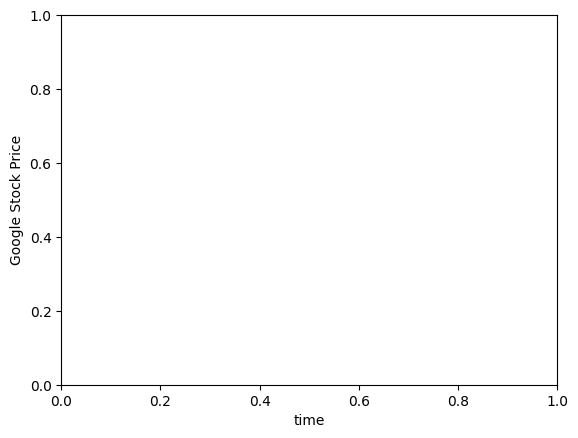

In [ ]:
plt.xlabel('time')
plt.ylabel('Google Stock Price')

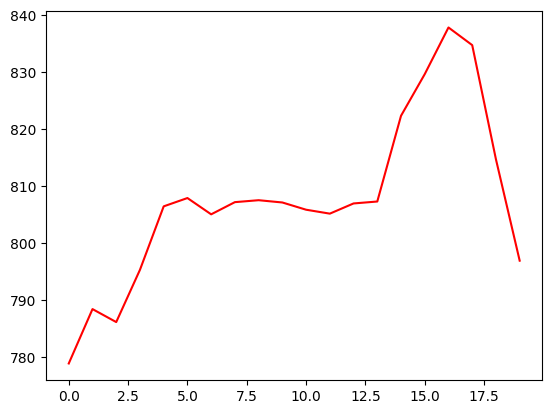

In [ ]:
plt.plot(real_stock_price, color='red', label='real Google Stock price')

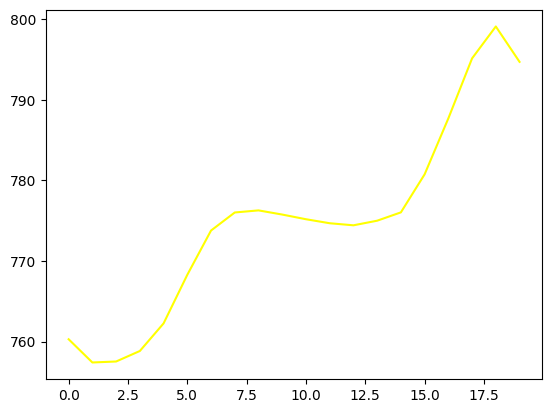

In [ ]:
plt.plot(predicted_stock_price, color='yellow', label='predicted stock price')

Text(0.5, 1.0, 'Google Stock Prediction')

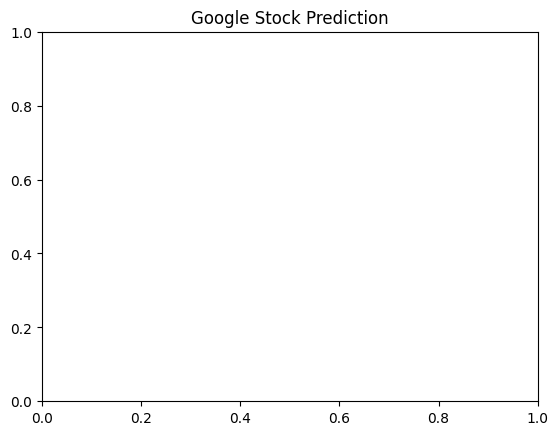

In [ ]:
plt.title('Google Stock Prediction')

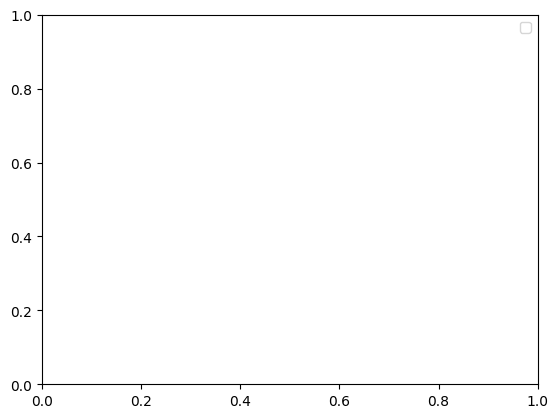

In [ ]:
plt.legend()

In [ ]:
plt.show()